In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from nltk.probability import FreqDist

In [3]:
RANDOM_STATE=0

In [4]:
df = pd.read_csv('15000_demoscrape.csv', index_col=0)

In [5]:
df.head()

,Name,Surname,Community
0,yogita,singh,punjabi
1,dibyendu,ghosh,bengali
2,veeramony,ramachandran,tamil
3,amlan,datta,bengali
4,susmita,poddar,bengali


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 3 columns):
Name         14999 non-null object
Surname      14999 non-null object
Community    14999 non-null object
dtypes: object(3)
memory usage: 468.7+ KB


# Visualisations

Looking at first names

In [7]:
df['Name'].value_counts()

rajesh         121
ashok           84
vijay           78
amit            77
abhishek        76
sandeep         74
sanjay          69
santosh         64
suresh          63
priyanka        61
mohammed        60
mukesh          60
vinod           58
pradeep         58
rajeev          57
nitin           57
ajay            56
mohd            55
vikas           55
ravi            54
prakash         52
vishal          51
manoj           50
suman           48
mahesh          48
rohit           47
rajiv           44
ashish          42
anil            39
rekha           39
              ... 
baidyanath       1
subhresh         1
deepen           1
kanya            1
ramavtar         1
janki            1
mit              1
christopher      1
apollo           1
sivaraman        1
maulik           1
sibith           1
teji             1
stayam           1
r.k.             1
saagar           1
mandira          1
raka             1
swastik          1
gaggan           1
raghwendra       1
safeeza     

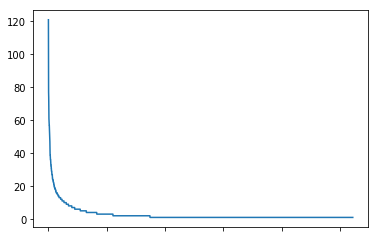

In [23]:
df['Name'].value_counts().plot() #how common are some names vs others

In [69]:
fd_names = FreqDist(df['Name'])

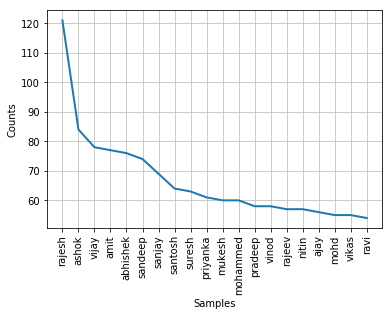

In [68]:
fd_names.plot(20) #20 most common names

Looking at surnames

In [24]:
df['Surname'].value_counts()

singh          1393
jain            412
das             270
patel           232
shah            207
kumar           183
verma           183
mishra          150
ghosh           148
gupta           137
arora           128
sharma          126
srivastava      125
roy             124
shaikh          108
saha            105
tiwari          102
pandey           99
nair             99
rao              93
yadav            90
saxena           84
mukherjee        83
kumari           83
sinha            80
jaiswal          78
agarwal          78
prakash          77
agrawal          77
khan             74
               ... 
de.               1
chawbey           1
keshwani          1
dhaliwal          1
baghel            1
singania          1
balani            1
rafi              1
dasari            1
sultania          1
maji              1
bhoite            1
shhu              1
jamadar           1
sain              1
ranju             1
azhar             1
choudhaury        1
ramiah            1


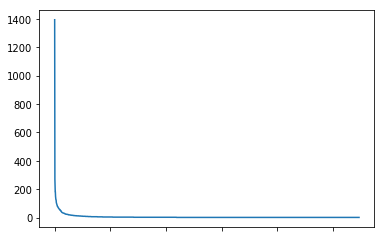

In [31]:
df['Surname'].value_counts().plot() #how common are some surnames vs others

In [70]:
fd_surnames = FreqDist(df['Surname'])

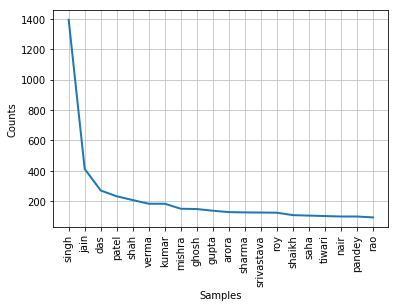

In [71]:
fd_surnames.plot(20) #20 most common surnames

Distribution of community in data

In [35]:
df['Community'].value_counts()

hindi        2935
punjabi      2208
bengali      2073
telugu       1770
gujarati     1760
marwari       674
oriya         672
tamil         661
marathi       545
urdu          446
malayalam     364
kannada       358
english       302
sindhi        131
assamese       30
konkani        26
nepali         13
kumaoni        10
garhwali        6
haryanavi       6
tulu            4
kashmiri        2
pashto          1
persian         1
mizo            1
Name: Community, dtype: int64

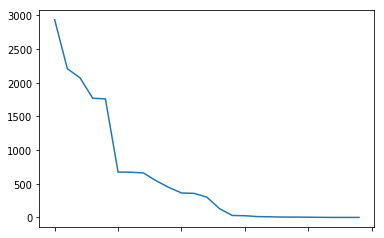

In [36]:
df['Community'].value_counts().plot()

:D

In [30]:
df[df.Name=='anusha']

,Name,Surname,Community
1506,anusha,venkat,tamil
13809,anusha,nama,tamil


In [28]:
df[df.Surname=='lihala']

,Name,Surname,Community


# Data Cleaning

Filtering out names that have non alphabetic characters or are less than 3 characters long

In [20]:
def valid_name(name):
    valid_chars="abcdefghijklmnopqrstuvwxyz"
    if(len(name)<=2):
        return False
    for ch in name:
        if ch not in valid_chars:
            return False
    return True

In [21]:
firstnames_mask = df['Name'].apply(valid_name)

In [16]:
#Looking at first names that will be filtered out
df[[not x for x in firstnames_mask]]

,Name,Surname,Community
25,m,mouli,telugu
125,b,rao,kannada
160,k,panda,oriya
191,md,alam,bengali
198,sujan.,dutta,bengali
230,rk,mishra,marwari
250,gp,mishra,marwari
254,a,.,tamil
285,j,singh,punjabi
527,km,khader,hindi


In [22]:
surnames_mask = df['Surname'].apply(valid_name)

In [18]:
#Looking at surnames that will be filtered out
df[[not x for x in surnames_mask]]

,Name,Surname,Community
53,jyothi,m,kannada
209,chetan,c,kannada
254,a,.,tamil
304,moksha,m,kannada
492,pallavi,p,kannada
859,anoop,g,kannada
1504,hemanth,b,kannada
1682,viswanath,g,telugu
1895,lokesh,j,kannada
2217,nagaraj,k,tamil


In [23]:
fullnames_mask = [fn and sn for fn,sn in zip(firstnames_mask,surnames_mask)]

# Exploring n-grams

Exploring name bigrams

In [26]:
def get_ngrams(words, n):
    return [word[i:i+n]  for word in words for i in range(len(word)-n+1)]

In [27]:
def get_mask_indices(mask):
    return np.argwhere(mask).reshape(1,-1)[0]

In [28]:
firstname_bigrams = get_ngrams(df['Name'][firstnames_mask], 2)

In [22]:
pd.Series(firstname_bigrams).value_counts()

sh    3661
an    3638
ra    2906
ha    2417
ar    1801
ma    1518
na    1375
it    1350
ee    1333
as    1172
am    1165
nd    1157
in    1150
sa    1137
hi    1114
ta    1112
ka    1087
ni    1069
al    1001
vi     989
es     986
aj     901
su     899
ri     886
ja     842
is     810
pr     796
ya     769
en     757
de     744
      ... 
wk       1
jl       1
zs       1
jb       1
kn       1
wq       1
xa       1
vg       1
hg       1
cq       1
fs       1
dl       1
hz       1
vm       1
vc       1
mz       1
cs       1
eu       1
bw       1
qs       1
gc       1
cv       1
fz       1
rq       1
gp       1
ci       1
gg       1
uu       1
vp       1
zy       1
Length: 484, dtype: int64

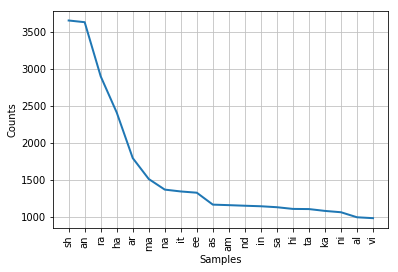

In [23]:
fd_fnbigrams=FreqDist(firstname_bigrams)
fd_fnbigrams.plot(20)

Exploring surname bigrams

In [29]:
surname_bigrams = get_ngrams(df['Surname'][surnames_mask], 2)

In [25]:
pd.Series(surname_bigrams).value_counts()

ha    2992
ar    2548
an    2276
in    2175
ra    2156
sh    1753
gh    1655
si    1613
ng    1566
ma    1454
al    1381
at    1163
pa    1098
ai    1067
wa    1034
as    1033
sa     945
na     863
ri     856
ka     851
ja     850
da     834
ch     830
ta     794
ah     769
nd     679
va     573
er     572
de     564
ga     550
      ... 
ft       1
jb       1
jl       1
bg       1
kc       1
uy       1
uq       1
jv       1
vh       1
wb       1
kn       1
io       1
db       1
wt       1
tm       1
ps       1
vl       1
bj       1
kj       1
fz       1
fs       1
ec       1
fu       1
nz       1
mw       1
ex       1
vg       1
pc       1
nl       1
vt       1
Length: 454, dtype: int64

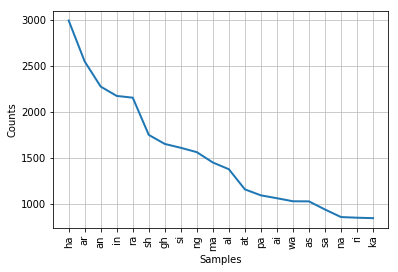

In [26]:
fd_snbigrams=FreqDist(surname_bigrams)
fd_snbigrams.plot(20)

Exploring name trigrams

In [30]:
firstname_trigrams = get_ngrams(df['Name'][firstnames_mask], 3)

In [28]:
pd.Series(firstname_trigrams).value_counts()

esh    940
sha    791
ish    691
ash    648
raj    627
pra    554
man    538
san    510
han    497
dra    449
ndr    442
har    435
ita    433
end    415
shi    409
ana    409
ant    400
anj    373
and    366
jay    361
ani    354
eet    353
bha    347
ind    346
dee    333
eep    327
nde    323
vin    317
ara    303
ika    292
      ... 
ual      1
vsa      1
ubd      1
ehj      1
riv      1
ruh      1
mza      1
oof      1
tbi      1
too      1
hja      1
wdh      1
aac      1
ogo      1
eis      1
lep      1
pjy      1
llo      1
rii      1
phe      1
bhh      1
dic      1
amc      1
lfi      1
ofa      1
one      1
axa      1
nuu      1
rqa      1
kuk      1
Length: 2987, dtype: int64

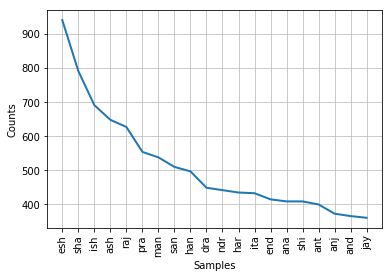

In [29]:
fd_fntrigrams=FreqDist(firstname_trigrams)
fd_fntrigrams.plot(20)

Exploring surname trigrams

In [31]:
surname_trigrams = get_ngrams(df['Surname'][surnames_mask], 3)

In [31]:
pd.Series(surname_trigrams).value_counts()

sin    1533
ing    1461
ngh    1443
sha     623
har     595
cha     586
han     585
jai     495
and     494
ain     475
pat     449
wal     429
rma     406
mar     378
ari     373
uma     317
das     315
kar     310
bha     307
kum     306
dha     306
ath     281
ish     276
gar     275
awa     269
hat     262
ate     260
ava     255
pra     252
man     242
       ... 
eol       1
jme       1
msu       1
ubu       1
ipi       1
edw       1
nzo       1
koy       1
khm       1
bus       1
job       1
gge       1
tts       1
gpu       1
stv       1
hdr       1
pav       1
hbh       1
wel       1
bro       1
ntw       1
rrm       1
dob       1
kkk       1
gui       1
hye       1
uar       1
tif       1
hke       1
vha       1
Length: 2366, dtype: int64

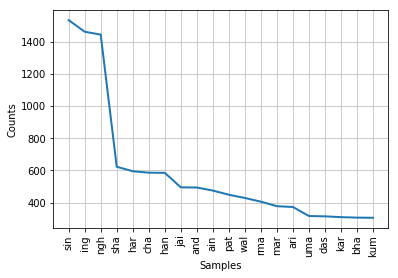

In [32]:
fd_sntrigrams=FreqDist(surname_trigrams)
fd_sntrigrams.plot(20)

# Training Classifiers

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [9]:
# getting labels (a number for each community)
le = LabelEncoder()

In [10]:
labels = le.fit_transform(df['Community'])

In [14]:
class Classifier:
    count = 0
    
    def __init__(self, name, description=""):
        self.name = name
        self.description = description
        self.vectorizer = CountVectorizer()
        self.metrics = {'accuracy': accuracy_score}
        self.scores = {}
        Classifier.count = Classifier.count + 1
        
    def fit(self, x, y, clf, vectorizer=None, metrics_dict=None):
        if vectorizer is not None:
            self.vectorizer = vectorizer
        if metrics_dict is not None:
            self.metrics.update(metrics_dict)
            
        x = self.vectorizer.fit_transform(x)
        self.clf = clf.fit(x,y)
        
        self.scores['train'] = {}
        for metric, metric_fn in self.metrics.items():
            self.scores['train'][metric] = metric_fn(y, self.clf.predict(x))
        
        self.print_scores('train')
        
    def predict(self, x):
        x = self.vectorizer.transform(x)
        return self.clf.predict(x)
    
    def score(self, x, y, data_set='dev', metrics_dict=None):
        if metrics_dict is not None:
            self.metrics.update(metrics_dict)
        
        self.scores[data_set] = {}
        for metric, metric_fn in self.metrics.items():
            self.scores[data_set][metric] = metric_fn(y, self.predict(x))
        
        self.print_scores(data_set)
        
        
    def print_scores(self, data_set):
        if data_set in self.scores:
            print('Scores on',data_set)
            scores_dict = self.scores[data_set]
            for metric, score in scores_dict.items():
                print(metric, "=", score)
        else:
            print('No scores available')
        print()
        
    def get_scores(self):
        for data_set in self.scores.keys():
            self.print_scores(data_set)
        
    def add_method(self, name, method):
        self.__setattr__(name, method)

## Naive Bayes

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

In [12]:
metrics_dict = {'f1_all':lambda y,y_pred: f1_score(y, y_pred, average=None, labels=list(range(25))), 
                'f1_micro':lambda y,y_pred: f1_score(y, y_pred, average='micro'),
                'f1_macro':lambda y,y_pred: f1_score(y, y_pred, average='macro'),
                'f1_weighted':lambda y,y_pred: f1_score(y, y_pred, average='weighted')}

In [109]:
X_train, X_dev, y_train, y_dev = train_test_split(df['Name'][firstnames_mask].values, labels[firstnames_mask], random_state = RANDOM_STATE)

In [16]:
clfs = {}

In [115]:
clfs['nb_fn_2'] = Classifier('nb_fn_2', description="naive bayes on first name bigrams")
clfs['nb_fn_2'].fit(X_train, y_train, MultinomialNB(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams([x],2)), metrics_dict=metrics_dict)
clfs['nb_fn_2'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on train
accuracy = 0.352315732564426
f1_all = [0.         0.38505232 0.16724739 0.         0.29120246 0.
 0.43300934 0.25443787 0.         0.17777778 0.61538462 0.19104478
 0.23103448 0.13312203 0.         0.         0.21192053 0.
 0.         0.36363636 0.36781609 0.27939698 0.37701472 0.
 0.44319776]
f1_micro = 0.352315732564426
f1_macro = 0.20509564557814997
f1_weighted = 0.3371866882865932

Scores on dev
accuracy = 0.3202702702702703
f1_all = [0.         0.3539823  0.19047619 0.         0.25345622 0.
 0.41371557 0.18965517 0.         0.         0.         0.1372549
 0.21367521 0.01970443 0.         0.         0.2081448  0.
 0.         0.34046512 0.20588235 0.28134557 0.34754797 0.
 0.28444444]
f1_micro = 0.3202702702702703
f1_macro = 0.1495543589069367
f1_weighted = 0.3043070224600764



In [116]:
clfs['nb_fn_3'] = Classifier('nb_fn_3', description="naive bayes on first name trigrams")
clfs['nb_fn_3'].fit(X_train, y_train, MultinomialNB(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams([x],3)), metrics_dict=metrics_dict)
clfs['nb_fn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on train
accuracy = 0.4903586231753469
f1_all = [0.07692308 0.56492162 0.27210884 0.         0.44875776 0.
 0.5514158  0.33426184 0.         0.48275862 0.         0.42180095
 0.30912477 0.27836611 0.         0.         0.4        0.
 0.         0.46061415 0.38461538 0.41478439 0.52781457 0.
 0.62369338]
f1_micro = 0.4903586231753469
f1_macro = 0.27299838621439604
f1_weighted = 0.47542299875979405

Scores on dev
accuracy = 0.3956756756756757
f1_all = [0.         0.47140381 0.2195122  0.         0.33255269 0.
 0.50597177 0.224      0.         0.75       0.         0.28571429
 0.17560976 0.01941748 0.         0.         0.23893805 0.
 0.         0.37181996 0.23333333 0.32911392 0.428      0.
 0.38509317]
f1_micro = 0.39567567567567574
f1_macro = 0.21610784467630395
f1_weighted = 0.3728263999057889



In [117]:
clfs['nb_fn_23'] = Classifier('nb_fn_23', description="naive bayes on first name bigrams and trigrams")
clfs['nb_fn_23'].fit(X_train, y_train, MultinomialNB(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams([x],2)+get_ngrams([x],3)), metrics_dict=metrics_dict)
clfs['nb_fn_23'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on train
accuracy = 0.4517030095512705
f1_all = [0.         0.503961   0.25165563 0.         0.40315908 0.
 0.5279661  0.28871391 0.         0.47826087 0.66666667 0.41269841
 0.34138973 0.22916667 0.         0.         0.36383208 0.
 0.         0.43124597 0.4372093  0.37083708 0.49455041 0.
 0.58187135]
f1_micro = 0.4517030095512705
f1_macro = 0.2826326770610507
f1_weighted = 0.4418599427467069

Scores on dev
accuracy = 0.3854054054054054
f1_all = [0.         0.44484305 0.21686747 0.         0.32685714 0.
 0.50184049 0.21538462 0.         0.5        0.         0.28571429
 0.2578125  0.00943396 0.         0.         0.24087591 0.
 0.         0.37335835 0.275      0.34482759 0.42650104 0.
 0.37837838]
f1_micro = 0.3854054054054054
f1_macro = 0.2085954251036278
f1_weighted = 0.37112920133719385



In [118]:
X_train, X_dev, y_train, y_dev = train_test_split(df['Surname'][surnames_mask].values, labels[surnames_mask], random_state = RANDOM_STATE)

In [119]:
clfs['nb_sn_2'] = Classifier('nb_sn_2', description="naive bayes on surname bigrams")
clfs['nb_sn_2'].fit(X_train, y_train, MultinomialNB(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams([x],2)), metrics_dict=metrics_dict)
clfs['nb_sn_2'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on train
accuracy = 0.5533989266547406
f1_all = [0.23529412 0.60770235 0.25308642 0.         0.60234959 0.
 0.48929081 0.52475248 0.         0.10526316 0.         0.50396825
 0.39777469 0.4691358  0.         0.         0.63985702 0.
 0.         0.74405328 0.11111111 0.44444444 0.48787447 0.
 0.58187599]
f1_micro = 0.5533989266547406
f1_macro = 0.2879133592176292
f1_weighted = 0.5495915353628488

Scores on dev
accuracy = 0.537429568017172
f1_all = [0.44444444 0.59368836 0.12371134 0.         0.5987526  0.
 0.45227606 0.3960396  0.         0.         0.         0.59016393
 0.34513274 0.46046512 0.         0.         0.6446281  0.
 0.         0.75874439 0.05405405 0.4        0.44676409 0.
 0.53211009]
f1_micro = 0.537429568017172
f1_macro = 0.34204874702046767
f1_weighted = 0.5316984020025789



In [120]:
clfs['nb_sn_3'] = Classifier('nb_sn_3', description="naive bayes on surname trigrams")
clfs['nb_sn_3'].fit(X_train, y_train, MultinomialNB(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams([x],3)), metrics_dict=metrics_dict)
clfs['nb_sn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on train
accuracy = 0.681216457960644
f1_all = [0.48484848 0.76780581 0.40506329 0.         0.75703704 0.
 0.56568627 0.6875     0.         0.2        0.         0.73221757
 0.67718447 0.57164068 0.         0.15384615 0.76254826 0.
 0.         0.8017673  0.37096774 0.62464722 0.63146151 0.
 0.65934066]
f1_micro = 0.681216457960644
f1_macro = 0.3941424991934132
f1_weighted = 0.6764507800644495

Scores on dev
accuracy = 0.6230211966729273
f1_all = [0.57142857 0.72156863 0.17391304 0.         0.70031546 0.
 0.51038576 0.60655738 0.         0.         0.         0.68674699
 0.568      0.54054054 0.         0.         0.71559633 0.
 0.         0.78777589 0.21052632 0.47904192 0.55755016 0.
 0.49302326]
f1_micro = 0.6230211966729273
f1_macro = 0.4161485114885828
f1_weighted = 0.6158898283169926



In [121]:
clfs['nb_sn_23'] = Classifier('nb_sn_23', description="naive bayes on surname bigrams and trigrams")
clfs['nb_sn_23'].fit(X_train, y_train, MultinomialNB(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams([x],2)+get_ngrams([x],3)), metrics_dict=metrics_dict)
clfs['nb_sn_23'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on train
accuracy = 0.6546511627906977
f1_all = [0.32258065 0.74061883 0.33121019 0.         0.73545966 0.
 0.54531451 0.63963964 0.         0.10526316 0.         0.66666667
 0.63625731 0.57377049 0.         0.         0.74538745 0.
 0.         0.7938238  0.33333333 0.57216495 0.57500921 0.
 0.6913229 ]
f1_micro = 0.6546511627906977
f1_macro = 0.3603129098952995
f1_weighted = 0.6496997212300953

Scores on dev
accuracy = 0.6120203917359807
f1_all = [0.75       0.69818913 0.16326531 0.         0.70350691 0.
 0.49920761 0.55357143 0.         0.         0.         0.66666667
 0.53435115 0.54811715 0.         0.         0.71264368 0.
 0.         0.78824546 0.10810811 0.43799472 0.53403141 0.
 0.57021277]
f1_micro = 0.6120203917359807
f1_macro = 0.4134055750867228
f1_weighted = 0.6053861759473466



In [24]:
X_train, X_dev, y_train, y_dev = train_test_split(df[['Name','Surname']][fullnames_mask].values, labels[fullnames_mask], random_state = RANDOM_STATE)

In [32]:
clfs['nb_fsn_3'] = Classifier('nb_fsn_3', description="naive bayes on first name and surname trigrams")
clfs['nb_fsn_3'].fit(X_train, y_train, MultinomialNB(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['nb_fsn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on train
accuracy = 0.7432015953589558
f1_all = [0.4137931  0.79614874 0.42524917 0.         0.78327833 0.
 0.70293083 0.71195652 0.         0.61538462 0.22222222 0.78225806
 0.70698925 0.65679926 1.         0.2        0.73969631 1.
 0.         0.82123386 0.62585034 0.68706811 0.71754069 0.
 0.77399381]
f1_micro = 0.7432015953589558
f1_macro = 0.535295728967625
f1_weighted = 0.7393184063807705

Scores on dev
accuracy = 0.6623164763458401
f1_all = [0.         0.75804968 0.27368421 0.         0.69621622 0.
 0.65876153 0.57142857 0.         0.         0.         0.66206897
 0.59649123 0.51873199 0.         0.         0.63492063 0.
 0.         0.77744807 0.23529412 0.53333333 0.60262009 0.
 0.69918699]
f1_micro = 0.6623164763458401
f1_macro = 0.39134455347117025
f1_weighted = 0.655566355677859



In [124]:
clfs['nb_fsn_23'] = Classifier('nb_fsn_23', description="naive bayes on first name and surname bigrams trigrams")
clfs['nb_fsn_23'].fit(X_train, y_train, MultinomialNB(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,2) + get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['nb_fsn_23'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.6999637418419145
f1_all = [0.35714286 0.75017349 0.35294118 0.         0.74697025 0.
 0.6471464  0.64788732 0.         0.28571429 0.22222222 0.74851485
 0.66666667 0.6038688  0.         0.2        0.70348837 0.
 0.         0.79584176 0.57534247 0.64632984 0.67924528 0.
 0.71468144]
f1_micro = 0.6999637418419145
f1_macro = 0.4137670992768108
f1_weighted = 0.6956513431974882



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.6326808047852094
f1_all = [0.         0.70805044 0.27956989 0.         0.66738197 0.
 0.6147248  0.5620915  0.         0.22222222 0.         0.66225166
 0.55319149 0.52083333 0.         0.         0.60941828 0.
 0.         0.75648703 0.23529412 0.5398773  0.58092176 0.
 0.68100358]
f1_micro = 0.6326808047852094
f1_macro = 0.39015806567590683
f1_weighted = 0.6280114240072823



Hence Trigrams for both first and last names are most meaningful for Naive Bayes classifier

In [125]:
# 10 most impt features for each class
for i, class_idx in enumerate(clfs['nb_fsn_3'].clf.classes_):
    print(le.classes_[class_idx])
    class_prob_sorted = clfs['nb_fsn_3'].clf.feature_log_prob_[i, :].argsort()
    print(np.take(clfs['nb_fsn_3'].vectorizer.get_feature_names(), class_prob_sorted[:10]))

assamese
['aab' 'onj' 'onk' 'onn' 'ono' 'onp' 'ons' 'ont' 'onu' 'onv']
bengali
['lhe' 'mmi' 'mle' 'mku' 'mkr' 'mke' 'mka' 'mji' 'mjh' 'mje']
english
['aab' 'ohi' 'ohk' 'ohl' 'ohm' 'oho' 'ohr' 'oht' 'ohu' 'oia']
garhwali
['aab' 'ope' 'oph' 'opi' 'opl' 'opn' 'opo' 'opr' 'ora' 'ord']
gujarati
['aab' 'nie' 'nif' 'nig' 'nij' 'nip' 'niw' 'niy' 'niz' 'njh']
haryanavi
['aab' 'ope' 'oph' 'opi' 'opl' 'opn' 'opo' 'opr' 'ora' 'ord']
hindi
['aab' 'nib' 'nic' 'nid' 'nie' 'nif' 'nij' 'nin' 'nip' 'niz']
kannada
['aab' 'oen' 'oer' 'ofa' 'ofe' 'off' 'ofi' 'ogc' 'ogh' 'ogi']
kashmiri
['aab' 'opl' 'opn' 'opo' 'opr' 'ora' 'ord' 'ore' 'org' 'ori']
konkani
['aab' 'ony' 'oob' 'ood' 'oof' 'ooh' 'ooj' 'ool' 'oom' 'oon']
kumaoni
['aab' 'oop' 'oor' 'opa' 'ope' 'oph' 'opi' 'opl' 'opn' 'opo']
malayalam
['aab' 'oct' 'odb' 'odd' 'odh' 'odi' 'odj' 'odr' 'odw' 'ody']
marathi
['aab' 'odj' 'odr' 'odw' 'ody' 'oeb' 'oel' 'oem' 'oen' 'oer']
marwari
['aab' 'nra' 'nri' 'nsd' 'nse' 'nsi' 'nso' 'nsr' 'nss' 'nsu']
mizo
['aab' 'o

train and dev f1 scores for each community as well as the total number of samples available for the community

In [33]:
clfs['nb_fsn_3'].scores_df = pd.DataFrame({'f1_train':clfs['nb_fsn_3'].scores['train']['f1_all'], 'f1_dev':clfs['nb_fsn_3'].scores['dev']['f1_all']}, index=le.classes_).join(pd.DataFrame(df['Community'].value_counts().rename('value_counts')))

In [34]:
clfs['nb_fsn_3'].scores_df.sort_values(by=['f1_dev','value_counts'])

,f1_dev,f1_train,value_counts
mizo,0.000000,1.000000,1
pashto,0.000000,1.000000,1
persian,0.000000,0.000000,1
kashmiri,0.000000,0.000000,2
tulu,0.000000,0.000000,4
garhwali,0.000000,0.000000,6
haryanavi,0.000000,0.000000,6
kumaoni,0.000000,0.222222,10
nepali,0.000000,0.200000,13
konkani,0.000000,0.615385,26


NB classifier on first name and last name trigrams does relatively well on Punjabi and Bengali names.

Overall, the greater number of available examples for a class, the better the performance (dev).

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
clfs['rf_fsn_3'] = Classifier('rf_fsn_3', description="random forest on first name and surname trigrams")
clfs['rf_fsn_3'].fit(X_train, y_train, RandomForestClassifier(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['rf_fsn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

Scores on train
accuracy = 0.9887599709934736
f1_all = [1.         0.98930481 0.97706422 1.         0.99237805 1.
 0.98466468 0.99539171 1.         0.94444444 1.         0.99447514
 0.99393939 0.98274112 1.         1.         0.99391481 1.
 1.         0.98962348 0.99459459 0.98850575 0.99003831 1.
 0.98157454]
f1_micro = 0.9887599709934736
f1_macro = 0.9917062018504751
f1_weighted = 0.9887548927659521



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.7074497009244154
f1_all = [0.22222222 0.80408859 0.42519685 0.5        0.72508215 0.
 0.71192661 0.61935484 0.         0.2        0.66666667 0.7133758
 0.62100457 0.47940075 0.         0.         0.74461538 0.
 0.         0.79669763 0.56       0.64285714 0.6482593  0.
 0.63589744]
f1_micro = 0.7074497009244154
f1_macro = 0.5103164724409006
f1_weighted = 0.7011945971881904



Random Forest overfits on data.

Trying Search over hyperparameters to reduce variance

In [142]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clfs['rf_fsn_3'].clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [131]:
from sklearn.model_selection import RandomizedSearchCV

In [152]:
random_grid = \
{'bootstrap': [True, False],
 'max_depth': [None]+list(range(5,50,5)),
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': list(range(1,12)),
 'min_samples_split': list(range(2,21)),
 'n_estimators': list(range(1,25))}

In [163]:
X_train_v = clfs['rf_fsn_3'].vectorizer.transform(X_train)
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 4, verbose=2, random_state=RANDOM_STATE, n_jobs = -1)

rf_random.fit(X_train_v, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   45.7s finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]},
          pre_dispatch='2*n_jobs', random_state=0

In [154]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 19,
 'n_estimators': 18}

In [167]:
clfs['rf_fsn_3_randsearch'] = Classifier('rf_fsn_3_randsearch', description="random forest on first name and surname trigrams, min_samples_split=10")
clfs['rf_fsn_3_randsearch'].fit(X_train, y_train, RandomForestClassifier().set_params(**rf_random.best_params_), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['rf_fsn_3_randsearch'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.78535170413343
f1_all = [0.51612903 0.83385777 0.43835616 0.         0.82191781 0.28571429
 0.75522322 0.71794872 0.         0.56       0.4        0.8111332
 0.74725275 0.59767442 0.         0.61538462 0.78586724 0.
 0.         0.86292655 0.6122449  0.74543502 0.79108635 0.
 0.77922078]
f1_micro = 0.7853517041334299
f1_macro = 0.5070949126375863
f1_weighted = 0.7795447721161721



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.6859706362153344
f1_all = [0.         0.77796902 0.35164835 0.         0.72829763 0.
 0.67625    0.58823529 0.         0.22222222 0.         0.67114094
 0.63013699 0.49438202 0.         0.         0.69902913 0.
 0.         0.791381   0.30508475 0.56357388 0.64059197 0.
 0.61139896]
f1_micro = 0.6859706362153344
f1_macro = 0.41673057865823826
f1_weighted = 0.6768852564648038



Lower dev scores.. ??

Trying a grid search on parameter ranges that seem promising

In [145]:
from sklearn.model_selection import GridSearchCV

In [164]:
params_grid = \
{'min_samples_split': list(range(2,7))+list(range(15,21)),
 'n_estimators': list(range(8,12))+list(range(18,21))}

In [165]:
params_grid

{'min_samples_split': [2, 3, 4, 5, 6, 15, 16, 17, 18, 19, 20],
 'n_estimators': [8, 9, 10, 11, 18, 19, 20]}

In [168]:
X_train_v = clfs['rf_fsn_3'].vectorizer.transform(X_train)
rf = RandomForestClassifier()

rf_grid = GridSearchCV(estimator = rf, param_grid = params_grid, cv = 4, verbose=2)

rf_grid.fit(X_train_v, y_train)

Fitting 4 folds for each of 77 candidates, totalling 308 fits
[CV] min_samples_split=2, n_estimators=8 .............................


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


[CV] .............. min_samples_split=2, n_estimators=8, total=   3.1s
[CV] min_samples_split=2, n_estimators=8 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] .............. min_samples_split=2, n_estimators=8, total=   2.9s
[CV] min_samples_split=2, n_estimators=8 .............................
[CV] .............. min_samples_split=2, n_estimators=8, total=   2.7s
[CV] min_samples_split=2, n_estimators=8 .............................
[CV] .............. min_samples_split=2, n_estimators=8, total=   2.8s
[CV] min_samples_split=2, n_estimators=9 .............................
[CV] .............. min_samples_split=2, n_estimators=9, total=   2.7s
[CV] min_samples_split=2, n_estimators=9 .............................
[CV] .............. min_samples_split=2, n_estimators=9, total=   3.2s
[CV] min_samples_split=2, n_estimators=9 .............................
[CV] .............. min_samples_split=2, n_estimators=9, total=   3.9s
[CV] min_samples_split=2, n_estimators=9 .............................
[CV] .............. min_samples_split=2, n_estimators=9, total=   3.6s
[CV] min_samples_split=2, n_estimators=10 ............................
[CV] .

[CV] .............. min_samples_split=4, n_estimators=8, total=   1.7s
[CV] min_samples_split=4, n_estimators=9 .............................
[CV] .............. min_samples_split=4, n_estimators=9, total=   2.0s
[CV] min_samples_split=4, n_estimators=9 .............................
[CV] .............. min_samples_split=4, n_estimators=9, total=   2.2s
[CV] min_samples_split=4, n_estimators=9 .............................
[CV] .............. min_samples_split=4, n_estimators=9, total=   2.0s
[CV] min_samples_split=4, n_estimators=9 .............................
[CV] .............. min_samples_split=4, n_estimators=9, total=   2.0s
[CV] min_samples_split=4, n_estimators=10 ............................
[CV] ............. min_samples_split=4, n_estimators=10, total=   2.1s
[CV] min_samples_split=4, n_estimators=10 ............................
[CV] ............. min_samples_split=4, n_estimators=10, total=   2.2s
[CV] min_samples_split=4, n_estimators=10 ............................
[CV] .

[CV] .............. min_samples_split=6, n_estimators=9, total=   1.6s
[CV] min_samples_split=6, n_estimators=9 .............................
[CV] .............. min_samples_split=6, n_estimators=9, total=   1.7s
[CV] min_samples_split=6, n_estimators=9 .............................
[CV] .............. min_samples_split=6, n_estimators=9, total=   1.7s
[CV] min_samples_split=6, n_estimators=10 ............................
[CV] ............. min_samples_split=6, n_estimators=10, total=   1.8s
[CV] min_samples_split=6, n_estimators=10 ............................
[CV] ............. min_samples_split=6, n_estimators=10, total=   1.9s
[CV] min_samples_split=6, n_estimators=10 ............................
[CV] ............. min_samples_split=6, n_estimators=10, total=   1.9s
[CV] min_samples_split=6, n_estimators=10 ............................
[CV] ............. min_samples_split=6, n_estimators=10, total=   1.9s
[CV] min_samples_split=6, n_estimators=11 ............................
[CV] .

[CV] ............. min_samples_split=16, n_estimators=9, total=   1.2s
[CV] min_samples_split=16, n_estimators=10 ...........................
[CV] ............ min_samples_split=16, n_estimators=10, total=   1.3s
[CV] min_samples_split=16, n_estimators=10 ...........................
[CV] ............ min_samples_split=16, n_estimators=10, total=   1.3s
[CV] min_samples_split=16, n_estimators=10 ...........................
[CV] ............ min_samples_split=16, n_estimators=10, total=   1.3s
[CV] min_samples_split=16, n_estimators=10 ...........................
[CV] ............ min_samples_split=16, n_estimators=10, total=   1.3s
[CV] min_samples_split=16, n_estimators=11 ...........................
[CV] ............ min_samples_split=16, n_estimators=11, total=   1.5s
[CV] min_samples_split=16, n_estimators=11 ...........................
[CV] ............ min_samples_split=16, n_estimators=11, total=   1.5s
[CV] min_samples_split=16, n_estimators=11 ...........................
[CV] .

[CV] ............ min_samples_split=18, n_estimators=10, total=   1.3s
[CV] min_samples_split=18, n_estimators=10 ...........................
[CV] ............ min_samples_split=18, n_estimators=10, total=   1.3s
[CV] min_samples_split=18, n_estimators=10 ...........................
[CV] ............ min_samples_split=18, n_estimators=10, total=   1.3s
[CV] min_samples_split=18, n_estimators=11 ...........................
[CV] ............ min_samples_split=18, n_estimators=11, total=   1.4s
[CV] min_samples_split=18, n_estimators=11 ...........................
[CV] ............ min_samples_split=18, n_estimators=11, total=   1.4s
[CV] min_samples_split=18, n_estimators=11 ...........................
[CV] ............ min_samples_split=18, n_estimators=11, total=   1.4s
[CV] min_samples_split=18, n_estimators=11 ...........................
[CV] ............ min_samples_split=18, n_estimators=11, total=   1.4s
[CV] min_samples_split=18, n_estimators=18 ...........................
[CV] .

[CV] ............ min_samples_split=20, n_estimators=10, total=   1.3s
[CV] min_samples_split=20, n_estimators=11 ...........................
[CV] ............ min_samples_split=20, n_estimators=11, total=   1.5s
[CV] min_samples_split=20, n_estimators=11 ...........................
[CV] ............ min_samples_split=20, n_estimators=11, total=   1.4s
[CV] min_samples_split=20, n_estimators=11 ...........................
[CV] ............ min_samples_split=20, n_estimators=11, total=   1.4s
[CV] min_samples_split=20, n_estimators=11 ...........................
[CV] ............ min_samples_split=20, n_estimators=11, total=   1.3s
[CV] min_samples_split=20, n_estimators=18 ...........................
[CV] ............ min_samples_split=20, n_estimators=18, total=   2.3s
[CV] min_samples_split=20, n_estimators=18 ...........................
[CV] ............ min_samples_split=20, n_estimators=18, total=   2.3s
[CV] min_samples_split=20, n_estimators=18 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 308 out of 308 | elapsed: 14.1min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 15, 16, 17, 18, 19, 20], 'n_estimators': [8, 9, 10, 11, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [170]:
rf_grid.best_params_

{'min_samples_split': 3, 'n_estimators': 19}

In [169]:
clfs['rf_fsn_3_gridsearch'] = Classifier('rf_fsn_3_gridsearch', description="random forest on first name and surname trigrams, min_samples_split=10")
clfs['rf_fsn_3_gridsearch'].fit(X_train, y_train, RandomForestClassifier().set_params(**rf_grid.best_params_), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['rf_fsn_3_gridsearch'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

Scores on train
accuracy = 0.9888506163886874
f1_all = [1.         0.98825897 0.95260664 0.8        0.9912381  1.
 0.98593498 0.99310345 1.         1.         1.         0.99816514
 0.99393939 0.98696088 1.         0.94117647 0.98696088 1.
 1.         0.98612341 1.         0.99792531 0.99579992 0.8
 0.98497496]
f1_micro = 0.9888506163886874
f1_macro = 0.9753267401507796
f1_weighted = 0.9887995635747706



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.7327351821642197
f1_all = [0.22222222 0.82764654 0.43564356 0.         0.76276958 0.
 0.72578616 0.65277778 0.         0.22222222 0.66666667 0.74172185
 0.67248908 0.55244755 0.         0.         0.75903614 0.
 0.         0.81836327 0.43835616 0.63120567 0.69018743 0.
 0.68932039]
f1_micro = 0.7327351821642198
f1_macro = 0.5004220145861188
f1_weighted = 0.7267706695958368



## AdaBoost

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
clfs['ab_fsn_3'] = Classifier('ab_fsn_3', description="Adaboost on first name and surname trigrams")
clfs['ab_fsn_3'].fit(X_train, y_train, AdaBoostClassifier(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['ab_fsn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.2577048585931835
f1_all = [0.         0.         0.         0.         0.         0.
 0.32821275 0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         1.
 0.         0.61322789 0.         0.         0.00152555 0.
 0.        ]
f1_micro = 0.2577048585931835
f1_macro = 0.11771864794057052
f1_weighted = 0.15871556064839917



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.2544861337683524
f1_all = [0.         0.         0.         0.         0.         0.
 0.33349633 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.62331288 0.         0.         0.         0.
 0.        ]
f1_micro = 0.2544861337683524
f1_macro = 0.04556234361685335
f1_weighted = 0.14947281870442197



In [45]:
clfs['ab_fsn_23'] = Classifier('ab_fsn_23', description="Adaboost on first name and surname bigrams and trigrams")
clfs['ab_fsn_23'].fit(X_train, y_train, AdaBoostClassifier(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,2) + get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['ab_fsn_23'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.2577048585931835
f1_all = [0.         0.         0.         0.         0.         0.
 0.32821275 0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         1.
 0.         0.61322789 0.         0.         0.00152555 0.
 0.        ]
f1_micro = 0.2577048585931835
f1_macro = 0.11771864794057052
f1_weighted = 0.15871556064839917



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.2544861337683524
f1_all = [0.         0.         0.         0.         0.         0.
 0.33349633 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.62331288 0.         0.         0.         0.
 0.        ]
f1_micro = 0.2544861337683524
f1_macro = 0.04556234361685335
f1_weighted = 0.14947281870442197



Default AdaBoost classifier does very poorly

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [47]:
clfs['lr_fsn_3'] = Classifier('lr_fsn_3', description="logistic regression on first name and surname trigrams")
clfs['lr_fsn_3'].fit(X_train, y_train, LogisticRegression(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['lr_fsn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on train
accuracy = 0.8733683828861494
f1_all = [0.9047619  0.91140896 0.65306122 0.         0.88149533 0.66666667
 0.83948897 0.87088608 0.         0.875      0.76923077 0.93690249
 0.87859825 0.83214649 1.         0.8        0.87174349 1.
 0.         0.89734058 0.86904762 0.86956522 0.87401869 0.8
 0.89930556]
f1_micro = 0.8733683828861494
f1_macro = 0.756026730547816
f1_weighted = 0.871797655027933

Scores on dev
accuracy = 0.7495921696574225
f1_all = [0.         0.82477876 0.49019608 0.         0.76521739 0.
 0.7457405  0.75471698 0.         0.22222222 0.         0.76129032
 0.70781893 0.6557377  0.         0.         0.77014925 0.
 0.         0.83561644 0.35483871 0.63043478 0.70627803 0.
 0.68965517]
f1_micro = 0.7495921696574225
f1_macro = 0.47212815587710083
f1_weighted = 0.7434768627829413



In [40]:
clfs['lr_fsn_23'] = Classifier('lr_fsn_23', description="logistic regression on first name and surname bigrams and trigrams")
clfs['lr_fsn_23'].fit(X_train, y_train, LogisticRegression(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,2) + get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['lr_fsn_23'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.8881435823060189
f1_all = [0.93023256 0.92013201 0.71666667 0.         0.89422356 0.8
 0.85394829 0.89826303 1.         0.97297297 0.93333333 0.94095238
 0.90663391 0.85192698 1.         0.875      0.87887888 1.
 1.         0.90684301 0.92655367 0.89077413 0.88696958 1.
 0.92020374]
f1_micro = 0.888143582306019
f1_macro = 0.8761803475423018
f1_weighted = 0.8871858795414143



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.7517672648178357
f1_all = [0.44444444 0.82005372 0.48598131 0.         0.76431718 0.
 0.75664894 0.7375     0.         0.2        0.         0.73202614
 0.70682731 0.64686469 0.         0.         0.75801749 0.
 0.         0.83984375 0.38095238 0.64827586 0.71668533 0.
 0.70422535]
f1_micro = 0.7517672648178357
f1_macro = 0.49250780441145037
f1_weighted = 0.74667975720378



## SVMs

In [46]:
from sklearn.svm import SVC

In [48]:
clfs['svmr_fsn_3'] = Classifier('svmr_fsn_3', description="SVM with rbf kernel on first name and surname trigrams")
clfs['svmr_fsn_3'].fit(X_train, y_train, SVC(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['svmr_fsn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.25734227701232776
f1_all = [0.         0.         0.         0.         0.         0.
 0.32786074 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.61449693 0.         0.         0.         0.
 0.        ]
f1_micro = 0.25734227701232776
f1_macro = 0.03769430689162556
f1_weighted = 0.15847718021203616



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.2544861337683524
f1_all = [0.         0.         0.         0.         0.         0.
 0.33325189 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.62561576 0.         0.         0.         0.
 0.        ]
f1_micro = 0.2544861337683524
f1_macro = 0.045660364620165025
f1_weighted = 0.1497271751712573



In [49]:
clfs['svmr_fsn_23'] = Classifier('svmr_fsn_23', description="SVM with rbf kernel on first name and surname bigrams and trigrams")
clfs['svmr_fsn_23'].fit(X_train, y_train, SVC(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,2) + get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['svmr_fsn_23'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.25734227701232776
f1_all = [0.         0.00268456 0.         0.         0.         0.
 0.32771721 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.61300755 0.         0.         0.         0.
 0.        ]
f1_micro = 0.25734227701232776
f1_macro = 0.03773637285332313
f1_weighted = 0.1585835895582161



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.2544861337683524
f1_all = [0.         0.00368324 0.         0.         0.         0.
 0.33300733 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.62407862 0.         0.         0.         0.
 0.        ]
f1_micro = 0.2544861337683524
f1_macro = 0.04575091429972625
f1_weighted = 0.15001791516576066



SVM with rbf kernel performs very poorly

In [50]:
clfs['svml_fsn_3'] = Classifier('svml_fsn_3', description="SVM with linear kernel on first name and surname trigrams")
clfs['svml_fsn_3'].fit(X_train, y_train, SVC(kernel='linear'), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['svml_fsn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.9509608411892676
f1_all = [1.         0.96505824 0.92009685 0.         0.95860235 1.
 0.92467652 0.97663551 1.         0.97297297 0.93333333 0.99267399
 0.9684466  0.91935484 1.         1.         0.95085256 1.
 1.         0.95481221 0.98378378 0.96963351 0.94785276 1.
 0.97822446]
f1_micro = 0.9509608411892677
f1_macro = 0.9326804197654534
f1_weighted = 0.9507361854701186



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.745241979336596
f1_all = [0.54545455 0.82426405 0.5        0.         0.76129032 0.
 0.74365482 0.73053892 0.         0.36363636 0.5        0.725
 0.71255061 0.62046205 0.         0.         0.71779141 0.
 0.         0.84188912 0.4057971  0.65277778 0.70716889 0.
 0.70093458]
f1_micro = 0.745241979336596
f1_macro = 0.5263433600310139
f1_weighted = 0.7417027205641732



In [51]:
clfs['svml_fsn_23'] = Classifier('svlm_fsn_23', description="SVM with linear kernel on first name and surname bigrams and trigrams")
clfs['svml_fsn_23'].fit(X_train, y_train, SVC(kernel='linear'), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,2) + get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['svml_fsn_23'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

Scores on train
accuracy = 0.9635605511240029
f1_all = [1.         0.976      0.94588235 0.8        0.96891585 1.
 0.93721145 0.99307159 1.         0.97297297 1.         0.99449541
 0.98660171 0.94343434 1.         1.         0.97467072 1.
 1.         0.96082474 1.         0.98550725 0.96307692 1.
 0.97993311]
f1_micro = 0.9635605511240029
f1_macro = 0.9753039366967589
f1_weighted = 0.963497372116347



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.7468733007069059
f1_all = [0.5        0.81906443 0.50746269 0.5        0.76567657 0.
 0.75079669 0.72727273 0.         0.4        1.         0.72049689
 0.70967742 0.6442953  0.         0.         0.71826625 0.
 0.         0.82507583 0.375      0.68531469 0.70356704 0.
 0.71889401]
f1_micro = 0.7468733007069059
f1_macro = 0.574802882477354
f1_weighted = 0.7434744001299007



SVM with linear kernel gives much higher scores for both train and dev than SVM with rbf kernel, however dev scores are similar to those given by Logistic Regression, which was much quicker to train

In [54]:
clfs['svmp_fsn_3'] = Classifier('svmp_fsn_3', description="SVM with poly (degree=3) kernel on first name and surname trigrams")
clfs['svmp_fsn_3'].fit(X_train, y_train, SVC(kernel='poly'), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['svmp_fsn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.19760696156635243
f1_all = [0.         0.         0.         0.         0.         0.
 0.33000303 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
f1_micro = 0.1976069615663524
f1_macro = 0.013200121102028459
f1_weighted = 0.06521089558199339



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.20174007612833061
f1_all = [0.         0.         0.         0.         0.         0.
 0.33574661 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
f1_micro = 0.2017400761283306
f1_macro = 0.01598793363499246
f1_weighted = 0.06773354592181961



In [53]:
clfs['svmp_fsn_23'] = Classifier('svlp_fsn_23', description="SVM with poly (degree=3) kernel on first name and surname bigrams and trigrams")
clfs['svmp_fsn_23'].fit(X_train, y_train, SVC(kernel='poly'), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,2) + get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['svmp_fsn_23'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.19760696156635243
f1_all = [0.         0.         0.         0.         0.         0.
 0.33000303 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
f1_micro = 0.1976069615663524
f1_macro = 0.013200121102028459
f1_weighted = 0.06521089558199339



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.20174007612833061
f1_all = [0.         0.         0.         0.         0.         0.
 0.33574661 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
f1_micro = 0.2017400761283306
f1_macro = 0.01598793363499246
f1_weighted = 0.06773354592181961



Default SVM with poly kernel gives very poor results

## k Nearest Neighbours

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
clfs['knn_fsn_3'] = Classifier('knn_fsn_3', description="kNN on first name and surname trigrams")
clfs['knn_fsn_3'].fit(X_train, y_train, KNeighborsClassifier(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['knn_fsn_3'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.7531725888324873
f1_all = [0.57142857 0.81125227 0.59125964 0.         0.77423775 0.6
 0.7361483  0.66285714 0.         0.64285714 0.4        0.71861472
 0.71633238 0.56790123 0.         0.         0.66290868 0.
 0.         0.82891125 0.64864865 0.77377049 0.73552686 0.
 0.78373383]
f1_micro = 0.7531725888324873
f1_macro = 0.48905555662058264
f1_weighted = 0.7485695781339124



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.6324089178901577
f1_all = [0.22222222 0.75434243 0.37931034 0.         0.65440465 0.
 0.63785047 0.55172414 0.         0.22222222 0.         0.625
 0.48756219 0.38888889 0.         0.         0.46052632 0.
 0.         0.72863248 0.20833333 0.5546875  0.57853403 0.
 0.68269231]
f1_micro = 0.6324089178901577
f1_macro = 0.3874730246533145
f1_weighted = 0.6204713865039307



In [57]:
clfs['knn_fsn_23'] = Classifier('knn_fsn_23', description="kNN on first name and surname bigrams and trigrams")
clfs['knn_fsn_23'].fit(X_train, y_train, KNeighborsClassifier(), vectorizer=CountVectorizer(analyzer=lambda x:get_ngrams(x,2) + get_ngrams(x,3)), metrics_dict=metrics_dict)
clfs['knn_fsn_23'].score(X_dev, y_dev, 'dev', metrics_dict=metrics_dict)

C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Scores on train
accuracy = 0.751178390137781
f1_all = [0.64864865 0.8202765  0.52763819 0.         0.77218225 0.66666667
 0.72674176 0.69060773 0.         0.62068966 0.4        0.67973856
 0.70070922 0.5861244  0.         0.         0.66366704 0.
 0.         0.83173653 0.62585034 0.76339286 0.73767095 0.
 0.79633028]
f1_micro = 0.751178390137781
f1_macro = 0.4903468633055779
f1_weighted = 0.7468081774025634



C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Scores on dev
accuracy = 0.6373028820010875
f1_all = [0.2        0.76112026 0.31932773 0.         0.64313725 0.
 0.63555818 0.56944444 0.         0.         0.         0.625
 0.53921569 0.37450199 0.         0.         0.5083612  0.
 0.         0.74143302 0.17777778 0.61176471 0.58441558 0.
 0.65700483]
f1_micro = 0.6373028820010875
f1_macro = 0.37847917513784385
f1_weighted = 0.6252560436081231



kNN is unable to fit data very well (it has high bias)

# Trying out embeddings

In [67]:
from keras.layers import Dense, Embedding, Input, GRU
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint 

C:\Users\anush\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [68]:
#get label/id for a character
def get_char_val(ch):
    n = ord(ch) - ord('a')
    if n>25 or n<0:
        n = 26
    return n

In [69]:
#get np array of labels/ids corresponding to characters in a name
def get_name_val(name):
    return np.array([get_char_val(c) for c in name])

In [70]:
#convert sequence of names to sequences of label arrays
def get_names_vals(names):
    return np.array([get_name_val(name) for name in names])

In [71]:
#get character corresponding to label
def get_val_char(val):
    return chr(val + ord('a'))

In [72]:
#get name corresponding to sequence of labels
def get_val_name(vals):
    return np.array([get_val_char(v) for v in vals])

In [73]:
EMBEDDING_DIM = 5 #embedding vector dimensions for a character (smaller value chosen to avoid overfitting small dataset)

In [74]:
n_classes = df['Community'].unique().shape[0]

In [75]:
n_vocab = 26

## RNN over characters

In [76]:
n_epochs = 20

Many to one sequence model

With varying sequence lengths (stochastic / 1 name per batch)

### Over last names only

In [24]:
def rnn_generator(X,y):
    for x_i, y_i in zip(X,y):
        yield (get_name_val(x_i).reshape(1,-1), to_categorical(y_i, num_classes=n_classes).reshape(1,-1))

In [23]:
def rnn_predict(names, model, argmax=True, x_processor=None):
    if x_processor is None:
        x_processor = lambda x: get_name_val(x).reshape(1,-1)
        
    predictions = []
    for name in names:
        result = model.predict( x_processor(name) )
        if argmax:
            result = np.argmax(result)
        predictions += [result]
    return np.array(predictions)

In [32]:
X_train, X_dev, y_train, y_dev = train_test_split(df['Surname'][surnames_mask].values, labels[surnames_mask], random_state = RANDOM_STATE)

In [82]:
inp = Input(batch_shape=(1,None,))
x = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)(inp)
x = GRU(64)(x)
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=inp, outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (1, None)                 0         
_________________________________________________________________
embedding_3 (Embedding)      (1, None, 5)              130       
_________________________________________________________________
gru_4 (GRU)                  (1, 64)                   13440     
_________________________________________________________________
dense_2 (Dense)              (1, 25)                   1625      
Total params: 15,195
Trainable params: 15,195
Non-trainable params: 0
_________________________________________________________________


In [83]:
check_point = ModelCheckpoint('checkpoints\\model_rnn_lastname.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(rnn_generator(X_train,y_train), validation_data=rnn_generator(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11180/11180 [==============================] - 83s 7ms/step - loss: 2.0481 - acc: 0.3598 - val_loss: 1.7642 - val_acc: 0.4752

Epoch 00001: val_loss improved from inf to 1.76423, saving model to model.hdf5
Epoch 2/20
11180/11180 [==============================] - 72s 6ms/step - loss: 1.6271 - acc: 0.5209 - val_loss: 1.4956 - val_acc: 0.5573

Epoch 00002: val_loss improved from 1.76423 to 1.49557, saving model to model.hdf5
Epoch 3/20
11180/11180 [==============================] - 70s 6ms/step - loss: 1.3940 - acc: 0.5886 - val_loss: 1.3635 - val_acc: 0.5991

Epoch 00003: val_loss improved from 1.49557 to 1.36348, saving model to model.hdf5
Epoch 4/20
11180/11180 [==============================] - 56s 5ms/step - loss: 1.2408 - acc: 0.6326 - val_loss: 1.2959 - val_acc: 0.6206

Epoch 00004: val_loss improved from 1.36348 to 1.29591, saving model to model.hdf5
Epoch 5/20
11180/11180 [==============================] - 79s 7ms/step - loss: 1.1420 - acc: 0.6574 - val_loss: 1.2592 -

In [25]:
metrics_dict['accuracy'] = accuracy_score

In [104]:
yhat_train = rnn_predict(X_train, model)
print('Train..')
for metric, metric_fn in metrics_dict.items():
    print(metric,"=", metric_fn(y_train, yhat_train))

Train..
f1_all = [0.71794872 0.83224401 0.34       0.         0.75893887 0.5
 0.66012216 0.70588235 0.         0.10526316 0.         0.69487751
 0.70113493 0.53056769 0.         0.6        0.81031308 0.
 0.         0.80210935 0.16363636 0.65259117 0.66214058 0.
 0.70700637]
f1_micro = 0.7176207513416817
f1_macro = 0.43779105203222535
f1_weighted = 0.7092129072705889
accuracy = 0.7176207513416816


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [180]:
yhat_dev = rnn_predict(X_dev, model)
print('Dev..')
for metric, metric_fn in metrics_dict.items():
    print(metric,"=", metric_fn(y_dev, yhat_dev))

Dev..
f1_all = [0.5        0.78793591 0.2        0.         0.72788354 0.
 0.60892388 0.58333333 0.         0.         0.         0.68789809
 0.53846154 0.45751634 0.         0.         0.76080692 0.
 0.         0.78219396 0.11111111 0.53374233 0.56374269 0.
 0.66046512]
f1_micro = 0.661658170110008
f1_macro = 0.42520073786658835
f1_weighted = 0.6512782685015335
accuracy = 0.661658170110008


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### Exploring name representations (last GRU state)

Adjusted Random Index is a metric which gives the similarity between 2 different sets of clusters.

Here we cluster name vector representations using KMeans and compare them with the actual clusters of communities to get an idea of how close name vectors from the same community are to each other

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [181]:
gru_layer = Model(inputs=model.input, outputs=model.layers[2].output)
name_vecs = rnn_predict(df['Surname'][surnames_mask].values, gru_layer, argmax=False)

In [192]:
name_vecs = np.squeeze(name_vecs)

In [195]:
km = KMeans(n_clusters=n_classes, random_state=RANDOM_STATE).fit(name_vecs)

In [196]:
name_vecs_clusters = km.labels_

In [197]:
#how well do name vector clusters correspond with community
adjusted_rand_score(name_vecs_clusters, labels[surnames_mask])

0.1531286968230099

... not very well

May have better results with more data?

### Over full names

In [22]:
from keras.layers import Concatenate, BatchNormalization, Dropout, Bidirectional
from keras import regularizers

In [25]:
def rnn_generator2(X,y):
    while True:
        for (x_fn_i, x_sn_i), y_i in zip(X,y):
            yield ({'fn':get_name_val(x_fn_i).reshape(1,-1), 'sn':get_name_val(x_sn_i).reshape(1,-1)}, to_categorical(y_i, num_classes=n_classes).reshape(1,-1))

In [26]:
X_train, X_dev, y_train, y_dev = train_test_split(df[['Name','Surname']][fullnames_mask].values, labels[fullnames_mask], random_state = RANDOM_STATE)

Considerations: Should first names and surnames use same or different RNNs? 
    
There would be fewer parameters with the same RNN - beneficial for limited data, but first names and surnames seem to be fundamentally different sets

In [28]:
#Different GRUs for first and last names
embedding_layer = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)
fn_inp = Input(batch_shape=(1,None,), name='fn')
fn_x = embedding_layer(fn_inp)
fn_x = GRU(32)(fn_x)
sn_inp = Input(batch_shape=(1,None,), name='sn')
sn_x = embedding_layer(sn_inp)
sn_x = GRU(32)(sn_x)
x = Concatenate()([fn_x, sn_x])
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=[fn_inp, sn_inp], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
fn (InputLayer)                 (1, None)            0                                            
__________________________________________________________________________________________________
sn (InputLayer)                 (1, None)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (1, None, 5)         130         fn[0][0]                         
                                                                 sn[0][0]                         
__________________________________________________________________________________________________
gru_1 (GRU)                     (1, 32)              3648        embedding_1[0][0]                
__________

In [204]:
check_point = ModelCheckpoint('checkpoints\\model_rnn_fullname.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(rnn_generator2(X_train,y_train), validation_data=rnn_generator2(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11032/11032 [==============================] - 64s 6ms/step - loss: 1.6725 - acc: 0.4751 - val_loss: 1.5626 - val_acc: 0.5101

Epoch 00001: val_loss improved from inf to 1.56262, saving model to model_rnn_fullname.hdf5
Epoch 2/20
11032/11032 [==============================] - 49s 4ms/step - loss: 1.4377 - acc: 0.5644 - val_loss: 1.3914 - val_acc: 0.5810

Epoch 00002: val_loss improved from 1.56262 to 1.39143, saving model to model_rnn_fullname.hdf5
Epoch 3/20
11032/11032 [==============================] - 47s 4ms/step - loss: 1.2608 - acc: 0.6171 - val_loss: 1.2659 - val_acc: 0.6267

Epoch 00003: val_loss improved from 1.39143 to 1.26588, saving model to model_rnn_fullname.hdf5
Epoch 4/20
11032/11032 [==============================] - 48s 4ms/step - loss: 1.1240 - acc: 0.6601 - val_loss: 1.1824 - val_acc: 0.6558

Epoch 00004: val_loss improved from 1.26588 to 1.18239, saving model to model_rnn_fullname.hdf5
Epoch 5/20
11032/11032 [==============================] - 47s 4ms/st

In [40]:
#Same GRU for first and last names
embedding_layer = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)
gru = GRU(48)
fn_inp = Input(batch_shape=(1,None,), name='fn')
fn_x = embedding_layer(fn_inp)
fn_x = gru(fn_x)
sn_inp = Input(batch_shape=(1,None,), name='sn')
sn_x = embedding_layer(sn_inp)
sn_x = gru(sn_x)
x = Concatenate()([fn_x, sn_x])
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=[fn_inp, sn_inp], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
fn (InputLayer)                 (1, None)            0                                            
__________________________________________________________________________________________________
sn (InputLayer)                 (1, None)            0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (1, None, 5)         130         fn[0][0]                         
                                                                 sn[0][0]                         
__________________________________________________________________________________________________
gru_15 (GRU)                    (1, 48)              7776        embedding_6[0][0]                
          

In [42]:
check_point = ModelCheckpoint('checkpoints\\model_rnn_fullname1.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(rnn_generator2(X_train,y_train), validation_data=rnn_generator2(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11032/11032 [==============================] - 83s 8ms/step - loss: 2.0723 - acc: 0.3282 - val_loss: 1.8742 - val_acc: 0.4035

Epoch 00001: val_loss improved from inf to 1.87418, saving model to model_rnn_fullname1.hdf5
Epoch 2/20
11032/11032 [==============================] - 65s 6ms/step - loss: 1.6695 - acc: 0.4815 - val_loss: 1.5098 - val_acc: 0.5313

Epoch 00002: val_loss improved from 1.87418 to 1.50981, saving model to model_rnn_fullname1.hdf5
Epoch 3/20
11032/11032 [==============================] - 71s 6ms/step - loss: 1.3613 - acc: 0.5862 - val_loss: 1.2978 - val_acc: 0.6150

Epoch 00003: val_loss improved from 1.50981 to 1.29777, saving model to model_rnn_fullname1.hdf5
Epoch 4/20
11032/11032 [==============================] - 54s 5ms/step - loss: 1.1541 - acc: 0.6458 - val_loss: 1.1778 - val_acc: 0.6539

Epoch 00004: val_loss improved from 1.29777 to 1.17777, saving model to model_rnn_fullname1.hdf5
Epoch 5/20
11032/11032 [==============================] - 37s 3m

Similar performance with similar number of parameters.

Difficult to say whether there is any benefit in sharing RNN layer.

In [29]:
def fullname_processor(fullname):
    return {'fn':get_name_val(fullname[0]).reshape(1,-1),'sn':get_name_val(fullname[1]).reshape(1,-1)}

In [50]:
yhat_train2 = rnn_predict(X_train, model, x_processor=fullname_processor)

In [51]:
yhat_dev2 = rnn_predict(X_dev, model, x_processor=fullname_processor)

In [75]:
print('Train..')
for metric, metric_fn in metrics_dict.items():
    print(metric,"=", metric_fn(y_train, yhat_train2))

Train..
f1_all = [0.68421053 0.85723794 0.595      0.         0.82251407 0.76923077
 0.79509871 0.72139303 0.         0.70967742 0.4        0.77480916
 0.76869965 0.72095333 1.         0.75       0.84020101 0.
 0.         0.86227192 0.65116279 0.76129032 0.81085332 0.8
 0.78913738]
f1_micro = 0.807741116751269
f1_macro = 0.6353496540877878
f1_weighted = 0.8065696191677791
accuracy = 0.807741116751269


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
print('Dev..')
for metric, metric_fn in metrics_dict.items():
    print(metric,"=", metric_fn(y_dev, yhat_dev2))

Dev..
f1_all = [0.         0.78888889 0.3442623  0.         0.73060345 0.
 0.72821847 0.57861635 0.         0.4        0.         0.5748503
 0.5754386  0.53459119 0.         0.4        0.74404762 0.
 0.         0.78024194 0.56       0.57857143 0.65336658 0.
 0.63070539]
f1_micro = 0.6965742251223491
f1_macro = 0.45725726198493116
f1_weighted = 0.693128811297419
accuracy = 0.6965742251223491


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Exploring name representations (last GRU state)

In [65]:
gru_fn = Model(inputs=model.input, outputs=model.layers[3].get_output_at(0))
gru_sn = Model(inputs=model.input, outputs=model.layers[3].get_output_at(1))

In [61]:
model.layers[4]

In [66]:
gru_vecs1 = np.squeeze(rnn_predict(df[['Name','Surname']][fullnames_mask].values, gru_fn, argmax=False, x_processor=fullname_processor))

In [67]:
gru_vecs2 = np.squeeze(rnn_predict(df[['Name','Surname']][fullnames_mask].values, gru_sn, argmax=False, x_processor=fullname_processor))

In [68]:
name_vecs2 = np.hstack([gru_vecs1, gru_vecs2])

In [71]:
km2 = KMeans(n_clusters=n_classes, random_state=RANDOM_STATE).fit(name_vecs2)

In [72]:
name_vecs2_clusters = km2.labels_

In [73]:
#how well do name vector clusters correspond with community
adjusted_rand_score(name_vecs2_clusters, labels[fullnames_mask])

0.14305019969241764

### Running more experiments with RNNs

Deeper network

In [36]:
embedding_layer = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)

fn_inp = Input(batch_shape=(1,None,), name='fn')
fn_x = embedding_layer(fn_inp)
fn_x = GRU(64, return_sequences=True)(fn_x)
fn_x = Dropout(0.2)(fn_x)
fn_x = GRU(64)(fn_x)

sn_inp = Input(batch_shape=(1,None,), name='sn')
sn_x = embedding_layer(sn_inp)
sn_x = GRU(64, return_sequences=True)(sn_x)
sn_x = Dropout(0.2)(sn_x)
sn_x = GRU(64)(sn_x)

x = Concatenate()([fn_x, sn_x])
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=[fn_inp, sn_inp], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
check_point = ModelCheckpoint('checkpoints\\model_rnn_fullname3.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(rnn_generator2(X_train,y_train), validation_data=rnn_generator2(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11032/11032 [==============================] - 75s 7ms/step - loss: 2.0249 - acc: 0.3466 - val_loss: 1.7811 - val_acc: 0.4454

Epoch 00001: val_loss improved from inf to 1.78106, saving model to model_rnn_fullname222.hdf5
Epoch 2/20
11032/11032 [==============================] - 67s 6ms/step - loss: 1.5322 - acc: 0.5341 - val_loss: 1.3689 - val_acc: 0.5813

Epoch 00002: val_loss improved from 1.78106 to 1.36889, saving model to model_rnn_fullname222.hdf5
Epoch 3/20
11032/11032 [==============================] - 60s 5ms/step - loss: 1.2296 - acc: 0.6294 - val_loss: 1.2009 - val_acc: 0.6378

Epoch 00003: val_loss improved from 1.36889 to 1.20095, saving model to model_rnn_fullname222.hdf5
Epoch 4/20
11032/11032 [==============================] - 61s 6ms/step - loss: 1.0463 - acc: 0.6755 - val_loss: 1.1135 - val_acc: 0.6713

Epoch 00004: val_loss improved from 1.20095 to 1.11347, saving model to model_rnn_fullname222.hdf5
Epoch 5/20
11032/11032 [==============================] 

In [78]:
embedding_layer = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)

fn_inp = Input(batch_shape=(1,None,), name='fn')
fn_x = embedding_layer(fn_inp)
fn_x = GRU(64, return_sequences=True)(fn_x)
fn_x = BatchNormalization()(fn_x)
fn_x = Dropout(0.2)(fn_x)
fn_x = GRU(64)(fn_x)

sn_inp = Input(batch_shape=(1,None,), name='sn')
sn_x = embedding_layer(sn_inp)
sn_x = GRU(64, return_sequences=True)(sn_x)
sn_x = BatchNormalization()(sn_x)
sn_x = Dropout(0.2)(sn_x)
sn_x = GRU(64)(sn_x)

x = Concatenate()([fn_x, sn_x])
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=[fn_inp, sn_inp], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
check_point = ModelCheckpoint('checkpoints\\model_rnn_fullname3ii.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(rnn_generator2(X_train,y_train), validation_data=rnn_generator2(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11032/11032 [==============================] - 83s 8ms/step - loss: 1.7107 - acc: 0.4748 - val_loss: 1.9981 - val_acc: 0.4078

Epoch 00001: val_loss improved from inf to 1.99810, saving model to model_rnn_fullname3ii.hdf5
Epoch 2/20
11032/11032 [==============================] - 72s 7ms/step - loss: 1.2214 - acc: 0.6290 - val_loss: 1.9271 - val_acc: 0.4347

Epoch 00002: val_loss improved from 1.99810 to 1.92705, saving model to model_rnn_fullname3ii.hdf5
Epoch 3/20
11032/11032 [==============================] - 63s 6ms/step - loss: 1.0192 - acc: 0.6875 - val_loss: 1.9319 - val_acc: 0.4331

Epoch 00003: val_loss did not improve from 1.92705
Epoch 4/20
11032/11032 [==============================] - 64s 6ms/step - loss: 0.8922 - acc: 0.7208 - val_loss: 1.8791 - val_acc: 0.4505

Epoch 00004: val_loss improved from 1.92705 to 1.87907, saving model to model_rnn_fullname3ii.hdf5
Epoch 5/20
11032/11032 [==============================] - 65s 6ms/step - loss: 0.8090 - acc: 0.7438 - va

Discussions on performance decrease when using Dropout and Batchnormalization together;
* https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout
* https://www.reddit.com/r/MachineLearning/comments/67gonq/d_batch_normalization_before_or_after_relu/

Papers;
* https://arxiv.org/pdf/1801.05134.pdf

In [80]:
embedding_layer = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)

fn_inp = Input(batch_shape=(1,None,), name='fn')
fn_x = embedding_layer(fn_inp)
fn_x = GRU(64, return_sequences=True)(fn_x)
fn_x = Dropout(0.2)(fn_x)
fn_x = BatchNormalization()(fn_x)
fn_x = GRU(64)(fn_x)

sn_inp = Input(batch_shape=(1,None,), name='sn')
sn_x = embedding_layer(sn_inp)
sn_x = GRU(64, return_sequences=True)(sn_x)
sn_x = Dropout(0.2)(sn_x)
sn_x = BatchNormalization()(sn_x)
sn_x = GRU(64)(sn_x)

x = Concatenate()([fn_x, sn_x])
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=[fn_inp, sn_inp], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
check_point = ModelCheckpoint('checkpoints\\model_rnn_fullname3iii.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(rnn_generator2(X_train,y_train), validation_data=rnn_generator2(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11032/11032 [==============================] - 83s 8ms/step - loss: 1.7655 - acc: 0.4546 - val_loss: 1.8470 - val_acc: 0.4383

Epoch 00001: val_loss improved from inf to 1.84701, saving model to model_rnn_fullname3iii.hdf5
Epoch 2/20
11032/11032 [==============================] - 80s 7ms/step - loss: 1.3082 - acc: 0.6022 - val_loss: 1.6570 - val_acc: 0.4943

Epoch 00002: val_loss improved from 1.84701 to 1.65701, saving model to model_rnn_fullname3iii.hdf5
Epoch 3/20
11032/11032 [==============================] - 74s 7ms/step - loss: 1.1097 - acc: 0.6557 - val_loss: 1.5901 - val_acc: 0.5204

Epoch 00003: val_loss improved from 1.65701 to 1.59012, saving model to model_rnn_fullname3iii.hdf5
Epoch 4/20
11032/11032 [==============================] - 74s 7ms/step - loss: 0.9915 - acc: 0.6935 - val_loss: 1.5833 - val_acc: 0.5321

Epoch 00004: val_loss improved from 1.59012 to 1.58331, saving model to model_rnn_fullname3iii.hdf5
Epoch 5/20
11032/11032 [============================

Insignificant improvement from order reversal

In [82]:
embedding_layer = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)

fn_inp = Input(batch_shape=(1,None,), name='fn')
fn_x = embedding_layer(fn_inp)
fn_x = GRU(64, return_sequences=True)(fn_x)
fn_x = BatchNormalization()(fn_x)
fn_x = GRU(64)(fn_x)

sn_inp = Input(batch_shape=(1,None,), name='sn')
sn_x = embedding_layer(sn_inp)
sn_x = GRU(64, return_sequences=True)(sn_x)
sn_x = BatchNormalization()(sn_x)
sn_x = GRU(64)(sn_x)

x = Concatenate()([fn_x, sn_x])
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=[fn_inp, sn_inp], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
check_point = ModelCheckpoint('checkpoints\\model_rnn_fullname3iv.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(rnn_generator2(X_train,y_train), validation_data=rnn_generator2(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11032/11032 [==============================] - 94s 9ms/step - loss: 1.6582 - acc: 0.4953 - val_loss: 1.9758 - val_acc: 0.3983

Epoch 00001: val_loss improved from inf to 1.97582, saving model to model_rnn_fullname3iv.hdf5
Epoch 2/20
11032/11032 [==============================] - 79s 7ms/step - loss: 1.1345 - acc: 0.6508 - val_loss: 1.8180 - val_acc: 0.4405

Epoch 00002: val_loss improved from 1.97582 to 1.81799, saving model to model_rnn_fullname3iv.hdf5
Epoch 3/20
11032/11032 [==============================] - 69s 6ms/step - loss: 0.8917 - acc: 0.7201 - val_loss: 2.0618 - val_acc: 0.3896

Epoch 00003: val_loss did not improve from 1.81799
Epoch 4/20
11032/11032 [==============================] - 74s 7ms/step - loss: 0.7258 - acc: 0.7700 - val_loss: 2.1574 - val_acc: 0.3812

Epoch 00004: val_loss did not improve from 1.81799
Epoch 5/20
11032/11032 [==============================] - 76s 7ms/step - loss: 0.6204 - acc: 0.8031 - val_loss: 2.2313 - val_acc: 0.3915

Epoch 00005: v

Batchnormalisation does not provide large enough regularisation effect 

Trying out Bidirectional layers;

In [31]:
embedding_layer = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)

fn_inp = Input(batch_shape=(1,None,), name='fn')
fn_x = embedding_layer(fn_inp)
fn_x = Bidirectional(GRU(64, return_sequences=True))(fn_x)
fn_x = Dropout(0.2)(fn_x)
fn_x = Bidirectional(GRU(64))(fn_x)

sn_inp = Input(batch_shape=(1,None,), name='sn')
sn_x = embedding_layer(sn_inp)
sn_x = Bidirectional(GRU(64, return_sequences=True))(sn_x)
sn_x = Dropout(0.2)(sn_x)
sn_x = Bidirectional(GRU(64))(sn_x)

x = Concatenate()([fn_x, sn_x])
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=[fn_inp, sn_inp], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
check_point = ModelCheckpoint('checkpoints\\model_rnn_fullname4.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(rnn_generator2(X_train,y_train), validation_data=rnn_generator2(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11032/11032 [==============================] - 118s 11ms/step - loss: 1.8821 - acc: 0.4107 - val_loss: 1.5547 - val_acc: 0.5131

Epoch 00001: val_loss improved from inf to 1.55472, saving model to checkpoints\model_rnn_fullname4.hdf5
Epoch 2/20
11032/11032 [==============================] - 105s 9ms/step - loss: 1.3477 - acc: 0.5944 - val_loss: 1.2364 - val_acc: 0.6278

Epoch 00002: val_loss improved from 1.55472 to 1.23643, saving model to checkpoints\model_rnn_fullname4.hdf5
Epoch 3/20
11032/11032 [==============================] - 105s 10ms/step - loss: 1.0593 - acc: 0.6722 - val_loss: 1.1256 - val_acc: 0.6659

Epoch 00003: val_loss improved from 1.23643 to 1.12561, saving model to checkpoints\model_rnn_fullname4.hdf5
Epoch 4/20
11032/11032 [==============================] - 102s 9ms/step - loss: 0.8608 - acc: 0.7308 - val_loss: 1.0150 - val_acc: 0.7045

Epoch 00004: val_loss improved from 1.12561 to 1.01499, saving model to checkpoints\model_rnn_fullname4.hdf5
Epoch 5/20

Insignificant improvement

Attempting to fit training data perfectly;

In [28]:
n_vocab=26
EMBEDDING_DIM=5
embedding_layer = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)
def gru_block(x):
    x = Bidirectional(GRU(64, return_sequences=True))(x)
    x = Dropout(0.2)(x)
    x = Bidirectional(GRU(64, return_sequences=True))(x)
    x = Dropout(0.2)(x)
    x = Bidirectional(GRU(64, return_sequences=False))(x)
    return x        

fn_inp = Input(batch_shape=(1,None,), name='fn')
fn_x = embedding_layer(fn_inp)
fn_x = gru_block(fn_x)

sn_inp = Input(batch_shape=(1,None,), name='sn')
sn_x = embedding_layer(sn_inp)
sn_x = gru_block(sn_x)
x = Concatenate()([fn_x, sn_x])
x = Dense(128)(x)
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=[fn_inp, sn_inp], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
check_point = ModelCheckpoint('checkpoints\\model_rnn_fullname5.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(rnn_generator2(X_train,y_train), validation_data=rnn_generator2(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11032/11032 [==============================] - 158s 14ms/step - loss: 2.0005 - acc: 0.3661 - val_loss: 1.7365 - val_acc: 0.4679

Epoch 00001: val_loss improved from inf to 1.73645, saving model to checkpoints\model_rnn_fullname5.hdf5
Epoch 2/20
11032/11032 [==============================] - 148s 13ms/step - loss: 1.5409 - acc: 0.5366 - val_loss: 1.4962 - val_acc: 0.5579

Epoch 00002: val_loss improved from 1.73645 to 1.49618, saving model to checkpoints\model_rnn_fullname5.hdf5
Epoch 3/20
11032/11032 [==============================] - 141s 13ms/step - loss: 1.3116 - acc: 0.6054 - val_loss: 1.3212 - val_acc: 0.6066

Epoch 00003: val_loss improved from 1.49618 to 1.32123, saving model to checkpoints\model_rnn_fullname5.hdf5
Epoch 4/20
11032/11032 [==============================] - 141s 13ms/step - loss: 1.1584 - acc: 0.6470 - val_loss: 1.3567 - val_acc: 0.6123

Epoch 00004: val_loss did not improve from 1.32123
Epoch 5/20
11032/11032 [==============================] - 140s 13m

Adding more layers gives worse performance on training data (?)

## CNN

In [102]:
from keras.utils import to_categorical
from keras.layers import concatenate, Conv1D, GlobalMaxPooling1D, Lambda, Flatten
from keras import backend

In [104]:
n_vocab = n_vocab + 1
n_vocab

27

### Over last names only

In [112]:
X_train, X_dev, y_train, y_dev = train_test_split(df['Surname'][surnames_mask].values, labels[surnames_mask], random_state = RANDOM_STATE)

In [109]:
def cnn_name_processor(name, const_val=n_vocab-1, pad=2):
    return np.pad(get_name_val(name), pad_width=pad, mode='constant', constant_values=const_val).reshape(1,-1)

In [110]:
# padding of 2 so minimum word length is 5
def cnn_generator(X, y, one_iter=False, x_processor=None):
    if x_processor is None:
        x_processor = cnn_name_processor
        
    while True:
        for x_i, y_i in zip(X,y):
            yield (x_processor(x_i), to_categorical(y_i, num_classes=n_classes).reshape(1,-1))
    
        if one_iter:
            break

In [123]:
def cnn_predict(names, model, argmax=True, x_processor=None):
    if x_processor is None:
        x_processor = cnn_name_processor
        
    predictions = []
    for name in names:
        result = model.predict( x_processor(name) )
        if argmax:
            result = np.argmax(result)
        predictions += [result]
    return np.array(predictions)

1D Convolution / convolution over time with filter sizes from 1 to 5 followed by max pooling over time (giving one element for each filter). Output is stacked into a single vector followed by a softmax.

In [105]:
conv_layers = []
for i in range(1,6):
    conv_layers.append( Conv1D(filters=10, kernel_size=(i,), strides=(1,)) )
    
inp = Input(shape=(None,))
x = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)(inp)
conv_outputs = []
for conv_layer in conv_layers:
    conv_outputs.append( GlobalMaxPooling1D() (conv_layer(x)) )
x = Lambda(lambda x: backend.stack(x, axis=1))(conv_outputs)
x = Flatten()(x) 
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=inp, outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, None, 5)      135         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, None, 10)     60          embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, None, 10)     110         embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_8 (

In [173]:
check_point = ModelCheckpoint('checkpoints\\model_cnn_surname.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(cnn_generator(X_train,y_train), validation_data=cnn_generator(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11180/11180 [==============================] - 68s 6ms/step - loss: 2.0208 - acc: 0.3788 - val_loss: 1.7786 - val_acc: 0.4671

Epoch 00001: val_loss improved from inf to 1.77857, saving model to model_cnn_surname.hdf5
Epoch 2/20
11180/11180 [==============================] - 67s 6ms/step - loss: 1.6976 - acc: 0.5002 - val_loss: 1.6202 - val_acc: 0.5272

Epoch 00002: val_loss improved from 1.77857 to 1.62019, saving model to model_cnn_surname.hdf5
Epoch 3/20
11180/11180 [==============================] - 68s 6ms/step - loss: 1.5609 - acc: 0.5405 - val_loss: 1.5437 - val_acc: 0.5500

Epoch 00003: val_loss improved from 1.62019 to 1.54365, saving model to model_cnn_surname.hdf5
Epoch 4/20
11180/11180 [==============================] - 68s 6ms/step - loss: 1.4834 - acc: 0.5647 - val_loss: 1.4943 - val_acc: 0.5707

Epoch 00004: val_loss improved from 1.54365 to 1.49427, saving model to model_cnn_surname.hdf5
Epoch 5/20
11180/11180 [==============================] - 68s 6ms/step -

In [106]:
model.load_weights("checkpoints\\model_cnn_surname.hdf5")

In [107]:
metrics_dict['accuracy'] = accuracy_score

In [113]:
yhat_train = cnn_predict(X_train, model)
print('Train..')
for metric, metric_fn in metrics_dict.items():
    print(metric,"=", metric_fn(y_train, yhat_train))

Train..
f1_all = [0.36363636 0.73938336 0.09448819 0.         0.68428373 0.
 0.61535088 0.52924791 0.         0.         0.         0.59277108
 0.60622463 0.4955157  0.         0.         0.74190871 0.
 0.         0.79279794 0.         0.54890788 0.52925764 0.
 0.59797297]
f1_micro = 0.6480322003577818
f1_macro = 0.31726987963465136
f1_weighted = 0.6312551048743819
accuracy = 0.6480322003577818


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [114]:
yhat_dev = cnn_predict(X_dev, model)
print('Dev..')
for metric, metric_fn in metrics_dict.items():
    print(metric,"=", metric_fn(y_dev, yhat_dev))

Dev..
f1_all = [0.18181818 0.70097604 0.05063291 0.         0.65989848 0.
 0.58964143 0.37777778 0.         0.         0.         0.65454545
 0.52884615 0.40860215 0.         0.         0.68894602 0.
 0.         0.78792822 0.         0.45592705 0.55086849 0.
 0.57971014]
f1_micro = 0.6235578213039978
f1_macro = 0.36080592520821814
f1_weighted = 0.6063165505549567
accuracy = 0.6235578213039978


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### Exploring name representations (last GRU state)

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [61]:
layer_output = Model(inputs=model.input, outputs=model.layers[-2].output)
name_vecs = cnn_predict(df['Surname'][surnames_mask].values, layer_output, argmax=False)

In [64]:
name_vecs = np.squeeze(name_vecs)

In [66]:
km = KMeans(n_clusters=n_classes, random_state=RANDOM_STATE).fit(name_vecs)

In [67]:
name_vecs_clusters = km.labels_

In [68]:
#how well do name vector clusters correspond with community
adjusted_rand_score(name_vecs_clusters, labels[surnames_mask])

0.09718642072415555

Significantly worse than RNN embeddings

### Over full names

In [115]:
X_train, X_dev, y_train, y_dev = train_test_split(df[['Name','Surname']][fullnames_mask].values, labels[fullnames_mask], random_state = RANDOM_STATE)

In [116]:
# padding of 2 so minimum word length is 5
def cnn_generator2(X, y, one_iter=False, x_processor=None):
    if x_processor is None:
        x_processor = cnn_name_processor
        
    while True:
        for x_i, y_i in zip(X,y):
            yield ({'fn': x_processor(x_i[0]), 'sn':x_processor(x_i[1])}, to_categorical(y_i, num_classes=n_classes).reshape(1,-1))
    
        if one_iter:
            break

In [117]:
embedding_layer = Embedding(n_vocab, EMBEDDING_DIM, trainable=True)
fn_inp = Input(shape=(None,), name='fn')
fn_x = embedding_layer(fn_inp)

sn_inp = Input(shape=(None,), name='sn')
sn_x = embedding_layer(sn_inp)

conv_layers = {'fn':[], 'sn':[]}
for inp_x in ['fn','sn']:
    for i in range(1,6):
        conv_layers[inp_x].append( Conv1D(filters=10, kernel_size=(i,), strides=(1,)) )
    
conv_outputs = []
for conv_layer in conv_layers['fn']:
    conv_outputs.append( GlobalMaxPooling1D() (conv_layer(fn_x)) )
for conv_layer in conv_layers['sn']:
    conv_outputs.append( GlobalMaxPooling1D() (conv_layer(sn_x)) )
    
x = Lambda(lambda x: backend.stack(x, axis=1))(conv_outputs)
x = Flatten()(x) 
out = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=[fn_inp, sn_inp], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
fn (InputLayer)                 (None, None)         0                                            
__________________________________________________________________________________________________
sn (InputLayer)                 (None, None)         0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, None, 5)      135         fn[0][0]                         
                                                                 sn[0][0]                         
__________________________________________________________________________________________________
conv1d_21 (Conv1D)              (None, None, 10)     60          embedding_6[0][0]                
__________

In [88]:
check_point = ModelCheckpoint('checkpoints\\model_cnn_fullname.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(cnn_generator2(X_train,y_train), validation_data=cnn_generator2(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11032/11032 [==============================] - 72s 7ms/step - loss: 1.9704 - acc: 0.3765 - val_loss: 1.7582 - val_acc: 0.4600

Epoch 00001: val_loss improved from inf to 1.75816, saving model to checkpoints\model_cnn_fullname.hdf5
Epoch 2/20
11032/11032 [==============================] - 46s 4ms/step - loss: 1.5862 - acc: 0.5141 - val_loss: 1.5492 - val_acc: 0.5294

Epoch 00002: val_loss improved from 1.75816 to 1.54921, saving model to checkpoints\model_cnn_fullname.hdf5
Epoch 3/20
11032/11032 [==============================] - 75s 7ms/step - loss: 1.4156 - acc: 0.5693 - val_loss: 1.4298 - val_acc: 0.5693

Epoch 00003: val_loss improved from 1.54921 to 1.42981, saving model to checkpoints\model_cnn_fullname.hdf5
Epoch 4/20
11032/11032 [==============================] - 76s 7ms/step - loss: 1.3075 - acc: 0.6032 - val_loss: 1.3560 - val_acc: 0.5949

Epoch 00004: val_loss improved from 1.42981 to 1.35603, saving model to checkpoints\model_cnn_fullname.hdf5
Epoch 5/20
11032/110

In [89]:
check_point = ModelCheckpoint('checkpoints\\model_cnn_fullname.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(cnn_generator2(X_train,y_train), validation_data=cnn_generator2(X_dev,y_dev), steps_per_epoch=len(X_train), validation_steps=len(X_dev), epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
11032/11032 [==============================] - 67s 6ms/step - loss: 0.9625 - acc: 0.7001 - val_loss: 1.1837 - val_acc: 0.6547

Epoch 00001: val_loss improved from inf to 1.18367, saving model to checkpoints\model_cnn_fullname.hdf5
Epoch 2/20
11032/11032 [==============================] - 63s 6ms/step - loss: 0.9573 - acc: 0.7019 - val_loss: 1.1832 - val_acc: 0.6574

Epoch 00002: val_loss improved from 1.18367 to 1.18323, saving model to checkpoints\model_cnn_fullname.hdf5
Epoch 3/20
11032/11032 [==============================] - 65s 6ms/step - loss: 0.9524 - acc: 0.7042 - val_loss: 1.1831 - val_acc: 0.6580

Epoch 00003: val_loss improved from 1.18323 to 1.18306, saving model to checkpoints\model_cnn_fullname.hdf5
Epoch 4/20
11032/11032 [==============================] - 67s 6ms/step - loss: 0.9486 - acc: 0.7046 - val_loss: 1.1828 - val_acc: 0.6555

Epoch 00004: val_loss improved from 1.18306 to 1.18282, saving model to checkpoints\model_cnn_fullname.hdf5
Epoch 5/20
11032/110

In [118]:
model.load_weights("checkpoints\\model_cnn_fullname.hdf5")

In [124]:
yhat_train = cnn_predict(X_train, model, x_processor=lambda x:{'fn': cnn_name_processor(x[0]), 'sn':cnn_name_processor(x[1])})
print('Train..')
for metric, metric_fn in metrics_dict.items():
    print(metric,"=", metric_fn(y_train, yhat_train))

Train..
f1_all = [0.73170732 0.7862157  0.41975309 0.         0.76328872 0.6
 0.70252324 0.63959391 1.         0.71428571 0.66666667 0.6389414
 0.71032746 0.63166954 1.         0.61538462 0.76356192 1.
 1.         0.81926242 0.5620915  0.61884368 0.68497711 1.
 0.67080745]
f1_micro = 0.7230783176214648
f1_macro = 0.7095960581032001
f1_weighted = 0.7222755482005473
accuracy = 0.7230783176214648


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [125]:
yhat_dev = cnn_predict(X_dev, model, x_processor=lambda x:{'fn': cnn_name_processor(x[0]), 'sn':cnn_name_processor(x[1])})
print('Dev..')
for metric, metric_fn in metrics_dict.items():
    print(metric,"=", metric_fn(y_dev, yhat_dev))

Dev..
f1_all = [0.16666667 0.75347222 0.25352113 0.         0.68965517 0.
 0.66278317 0.53631285 0.         0.46153846 0.66666667 0.59119497
 0.65254237 0.55525606 0.         0.5        0.73142857 0.
 0.         0.76363636 0.44067797 0.51590106 0.56225931 0.
 0.65198238]
f1_micro = 0.6579662860250136
f1_macro = 0.48359501857008497
f1_weighted = 0.6555693772422725
accuracy = 0.6579662860250136


C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### Exploring name representations (last GRU state)

In [128]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [131]:
layer_output = Model(inputs=model.input, outputs=model.layers[-2].output)
name_vecs = cnn_predict(df[['Name','Surname']][fullnames_mask].values, layer_output, argmax=False, x_processor=lambda x:{'fn': cnn_name_processor(x[0]), 'sn':cnn_name_processor(x[1])})

In [133]:
name_vecs = np.squeeze(name_vecs)

In [134]:
km = KMeans(n_clusters=n_classes, random_state=RANDOM_STATE).fit(name_vecs)

In [136]:
name_vecs_clusters = km.labels_

In [138]:
#how well do name vector clusters correspond with community
adjusted_rand_score(name_vecs_clusters, labels[fullnames_mask])

0.06774717855884567

## Supervised Learning Conclusion

Out of all the tried models, Logistic Regression seems to be the best option, taking both dev scores and speed of training and predicting into consideration.

The neural network models may have better performance with more data.

# Unsupervised Learning

## Autoencoders

In [40]:
import keras.backend as K
from keras.layers import Lambda, RepeatVector

In [23]:
n_vocab = 26

In [24]:
X_train, X_dev, y_train, y_dev = train_test_split(df[['Name','Surname']][fullnames_mask].values, labels[fullnames_mask], random_state = RANDOM_STATE)

In [32]:
def autoencoder_generator(X, one_iter=False, x_processor=None, n_vocab=n_vocab):
    if x_processor is None:
        x_processor = lambda x: to_categorical(get_name_val(x).reshape(1,-1), num_classes=n_vocab)
        
    while True:
        for x_i in X:
            yield (x_processor(x_i), x_processor(x_i))
    
        if one_iter:
            break

In [28]:
def autoencoder_generator2(X, one_iter=False, x_processor=None):
    while True:
        for i in range(X.shape[-1]):
            for x_i, y_i  in autoencoder_generator(X[:,i], one_iter=True, x_processor=x_processor):
                yield (x_i, y_i)
                
        if one_iter:
            break

In [91]:
def repeat_vector(args):
        layer_to_repeat = args[0]
        sequence_layer = args[1]
        return RepeatVector(K.shape(sequence_layer)[1])(layer_to_repeat)

inp = Input(batch_shape=(1,None,n_vocab))
x = Bidirectional(GRU(32, return_sequences=False))(inp)
x = Dense(4)(x)
x = Lambda(repeat_vector, output_shape=(None,4))([x, inp])
x = GRU(64, return_sequences=True)(x)
out = Dense(n_vocab, activation='softmax')(x)
model = Model(inputs=inp, outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [92]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           (1, None, 26)        0                                            
__________________________________________________________________________________________________
bidirectional_26 (Bidirectional (1, 64)              11328       input_26[0][0]                   
__________________________________________________________________________________________________
dense_12 (Dense)                (1, 4)               260         bidirectional_26[0][0]           
__________________________________________________________________________________________________
lambda_22 (Lambda)              (1, None, 4)         0           dense_12[0][0]                   
                                                                 input_26[0][0]                   
__________

In [93]:
check_point = ModelCheckpoint('checkpoints\\model_autoencoder1.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(autoencoder_generator2(X_train), validation_data=autoencoder_generator2(X_dev), steps_per_epoch=len(X_train)*2, validation_steps=len(X_dev)*2, epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
22064/22064 [==============================] - 135s 6ms/step - loss: 1.6573 - acc: 0.4964 - val_loss: 1.5519 - val_acc: 0.5594

Epoch 00001: val_loss improved from inf to 1.55193, saving model to checkpoints\model_autoencoder3.hdf5
Epoch 2/20
22064/22064 [==============================] - 128s 6ms/step - loss: 1.2322 - acc: 0.6362 - val_loss: 1.3296 - val_acc: 0.6196

Epoch 00002: val_loss improved from 1.55193 to 1.32963, saving model to checkpoints\model_autoencoder3.hdf5
Epoch 3/20
22064/22064 [==============================] - 102s 5ms/step - loss: 1.0844 - acc: 0.6829 - val_loss: 1.2156 - val_acc: 0.6513

Epoch 00003: val_loss improved from 1.32963 to 1.21561, saving model to checkpoints\model_autoencoder3.hdf5
Epoch 4/20
22064/22064 [==============================] - 113s 5ms/step - loss: 1.0056 - acc: 0.7082 - val_loss: 1.1611 - val_acc: 0.6749

Epoch 00004: val_loss improved from 1.21561 to 1.16112, saving model to checkpoints\model_autoencoder3.hdf5
Epoch 5/20
22064

In [143]:
def repeat_vector(args):
        layer_to_repeat = args[0]
        sequence_layer = args[1]
        return RepeatVector(K.shape(sequence_layer)[1])(layer_to_repeat)

inp = Input(batch_shape=(1,None,n_vocab))
x = Bidirectional(GRU(32, return_sequences=True))(inp)
x = Bidirectional(GRU(32, return_sequences=False))(x)
x = Dense(4)(x)
x = Lambda(repeat_vector, output_shape=(None,4))([x, inp])
x = GRU(64, return_sequences=True)(x)
x = GRU(64, return_sequences=True)(x)
out = Dense(n_vocab, activation='softmax')(x)
model = Model(inputs=inp, outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           (1, None, 26)        0                                            
__________________________________________________________________________________________________
bidirectional_29 (Bidirectional (1, None, 64)        11328       input_28[0][0]                   
__________________________________________________________________________________________________
bidirectional_30 (Bidirectional (1, 64)              18624       bidirectional_29[0][0]           
__________________________________________________________________________________________________
dense_14 (Dense)                (1, 4)               260         bidirectional_30[0][0]           
__________________________________________________________________________________________________
lambda_23 

In [98]:
check_point = ModelCheckpoint('checkpoints\\model_autoencoder2.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=True, restore_best_weights=True)
model.fit_generator(autoencoder_generator2(X_train), validation_data=autoencoder_generator2(X_dev), steps_per_epoch=len(X_train)*2, validation_steps=len(X_dev)*2, epochs=n_epochs, verbose=1, callbacks=[early_stop,check_point])

Epoch 1/20
22064/22064 [==============================] - 212s 10ms/step - loss: 1.5442 - acc: 0.5386 - val_loss: 1.4169 - val_acc: 0.6010

Epoch 00001: val_loss improved from inf to 1.41691, saving model to checkpoints\model_autoencoder4.hdf5
Epoch 2/20
22064/22064 [==============================] - 190s 9ms/step - loss: 1.1047 - acc: 0.6822 - val_loss: 1.1969 - val_acc: 0.6627

Epoch 00002: val_loss improved from 1.41691 to 1.19685, saving model to checkpoints\model_autoencoder4.hdf5
Epoch 3/20
22064/22064 [==============================] - 189s 9ms/step - loss: 0.9646 - acc: 0.7239 - val_loss: 1.1028 - val_acc: 0.6900

Epoch 00003: val_loss improved from 1.19685 to 1.10280, saving model to checkpoints\model_autoencoder4.hdf5
Epoch 4/20
22064/22064 [==============================] - 188s 9ms/step - loss: 0.8942 - acc: 0.7445 - val_loss: 1.0213 - val_acc: 0.7139

Epoch 00004: val_loss improved from 1.10280 to 1.02128, saving model to checkpoints\model_autoencoder4.hdf5
Epoch 5/20
2206

## Exploring embeddings

In [149]:
x_processor = lambda x: to_categorical(get_name_val(x).reshape(1,-1), num_classes=n_vocab)

In [173]:
encoder = Model(inputs=model.input, outputs=model.layers[3].output)
autoencoded_fn_vecs = encoder.predict_generator(autoencoder_generator(df['Name'][fullnames_mask]), steps=sum(fullnames_mask))
autoencoded_sn_vecs = encoder.predict_generator(autoencoder_generator(df['Surname'][fullnames_mask]), steps=sum(fullnames_mask))

In [176]:
autoencoded_vecs = np.hstack([autoencoded_fn_vecs,autoencoded_sn_vecs])

In [177]:
autoencoded_vecs.shape

(14710, 8)

In [178]:
km = KMeans(n_clusters=n_classes, random_state=RANDOM_STATE).fit(autoencoded_vecs)

In [179]:
autoencoded_vecs_clusters = km.labels_

In [180]:
#how well do name vector clusters correspond with community
adjusted_rand_score(autoencoded_vecs_clusters, labels[fullnames_mask])

0.019626143216108612

Autoencoder does not learn name representations that map to community very well

# Things to try

* Using clustering algorithms other than KMeans to analyse name vector representations
* Using one shot neural network learning techniqus
* Using a GAN-like architecture where one network generates names given a community and another classifies whether a name belongs to a particular community or not